In [1]:
%matplotlib inline
import pandas as pd
import warnings
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime
plt.rcParams['figure.figsize'] = [16, 10]

In [2]:
train = pd.read_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/train_trans.csv')
test = pd.read_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/test_trans.csv')

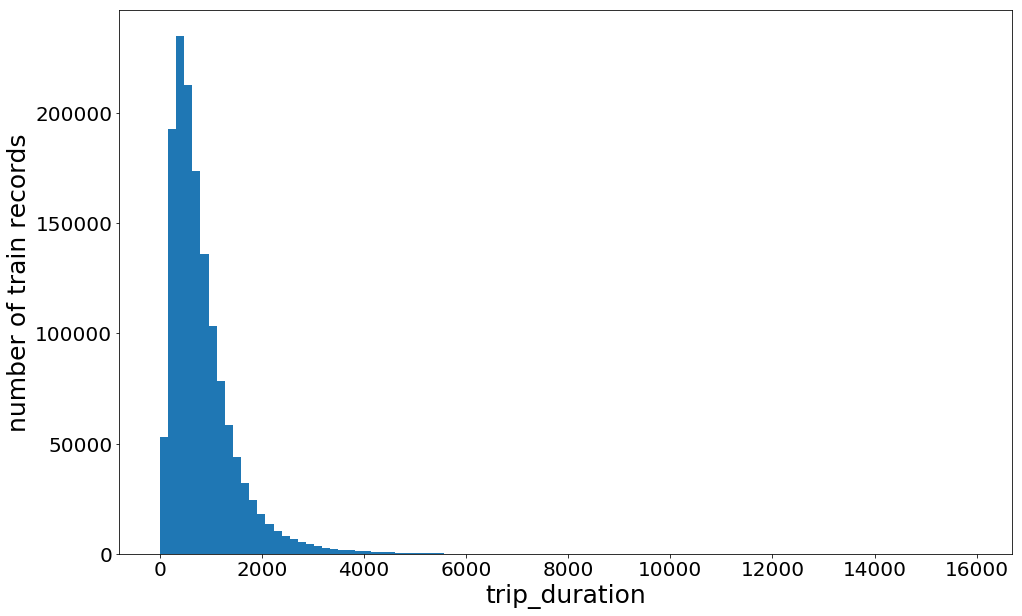

In [4]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration',fontsize=25)
plt.ylabel('number of train records',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.1.png')
plt.show()

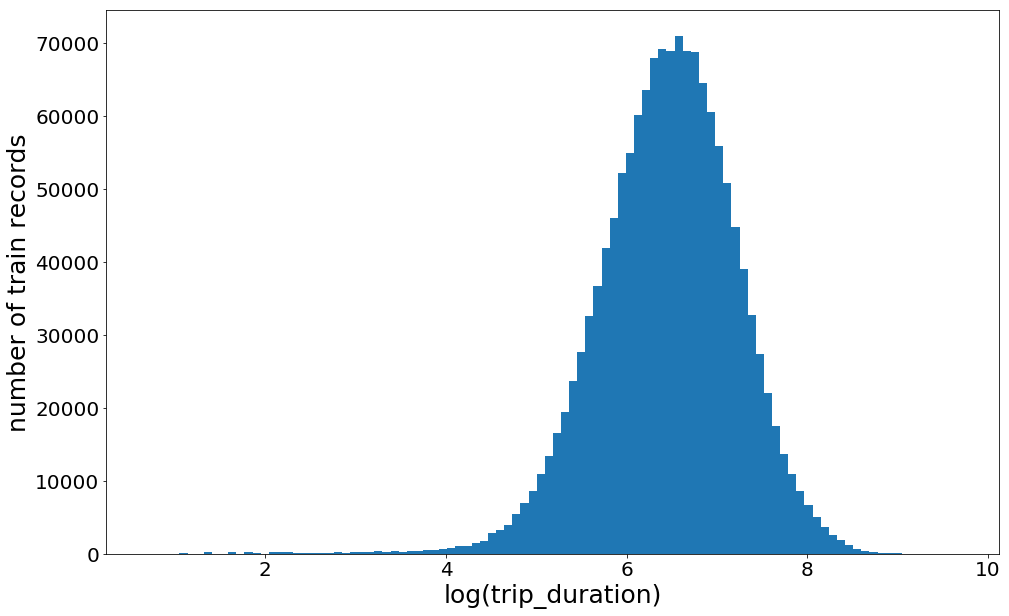

In [5]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)',fontsize=25)
plt.ylabel('number of train records',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.2.png')
plt.show()

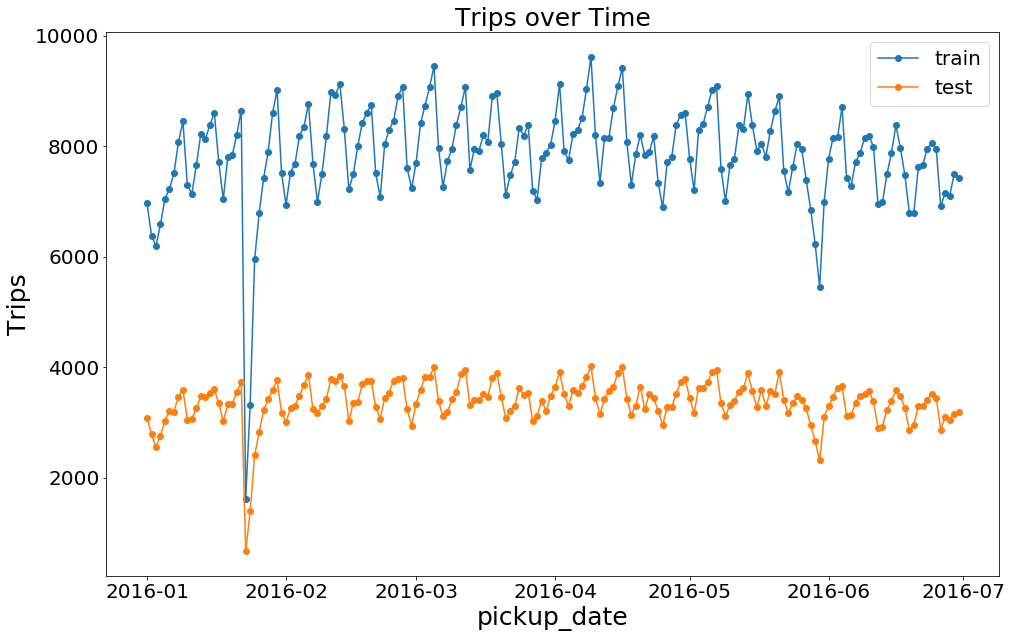

In [6]:
train['pickup_date'] = pd.to_datetime(train.pickup_date)
test['pickup_date'] = pd.to_datetime(test.pickup_date)
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time',fontsize=25)
plt.legend(loc=0,prop={'size':20})
plt.ylabel('Trips',fontsize=25)
plt.xlabel('pickup_date',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().xaxis.set_major_locator(mdate.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter("%Y-%m"))
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.3.png')
plt.show()

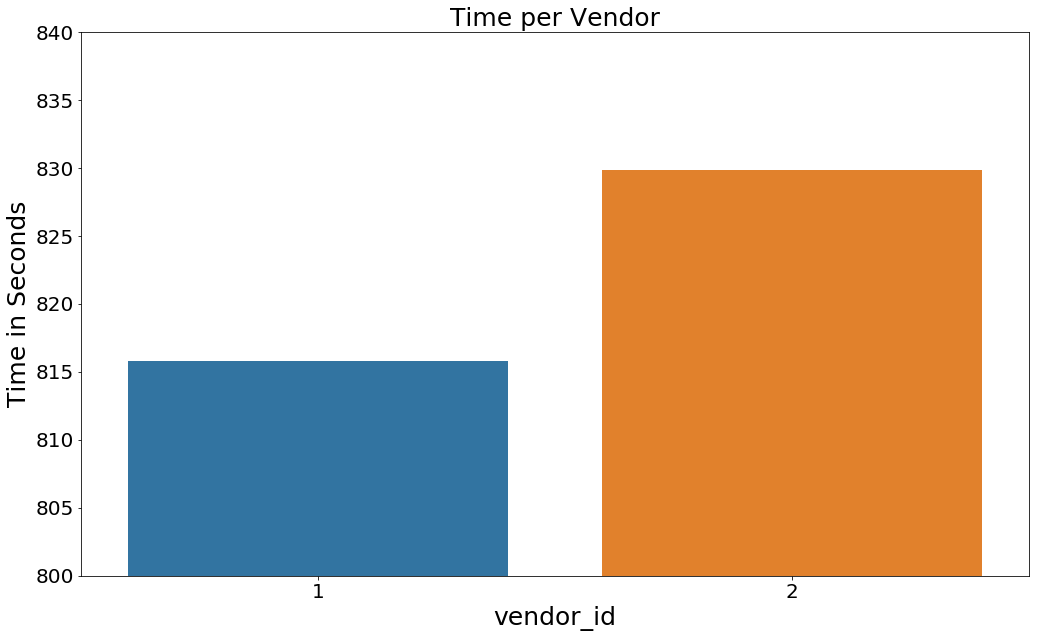

In [7]:
warnings.filterwarnings("ignore")
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time per Vendor',fontsize=25)
plt.legend(loc=0)
plt.xlabel('vendor_id',fontsize=25)
plt.ylabel('Time in Seconds',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.4.png')

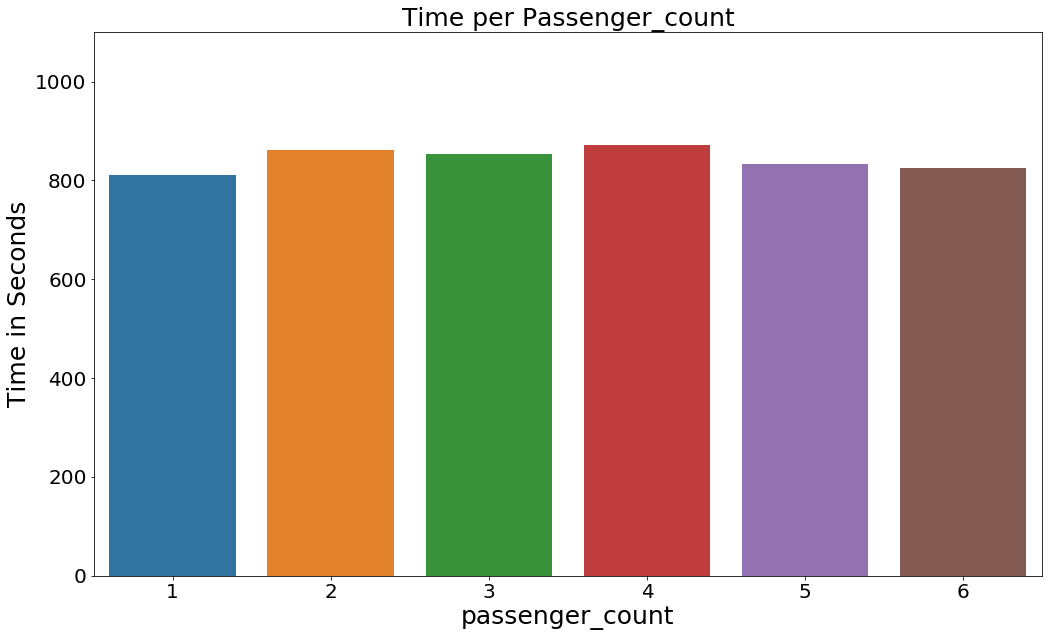

In [8]:
pc = train.groupby('passenger_count')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per Passenger_count',fontsize=25)
plt.legend(loc=0)
plt.xlabel('passenger_count',fontsize=25)
plt.ylabel('Time in Seconds',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.barplot(pc.index,pc.values)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.5.png')

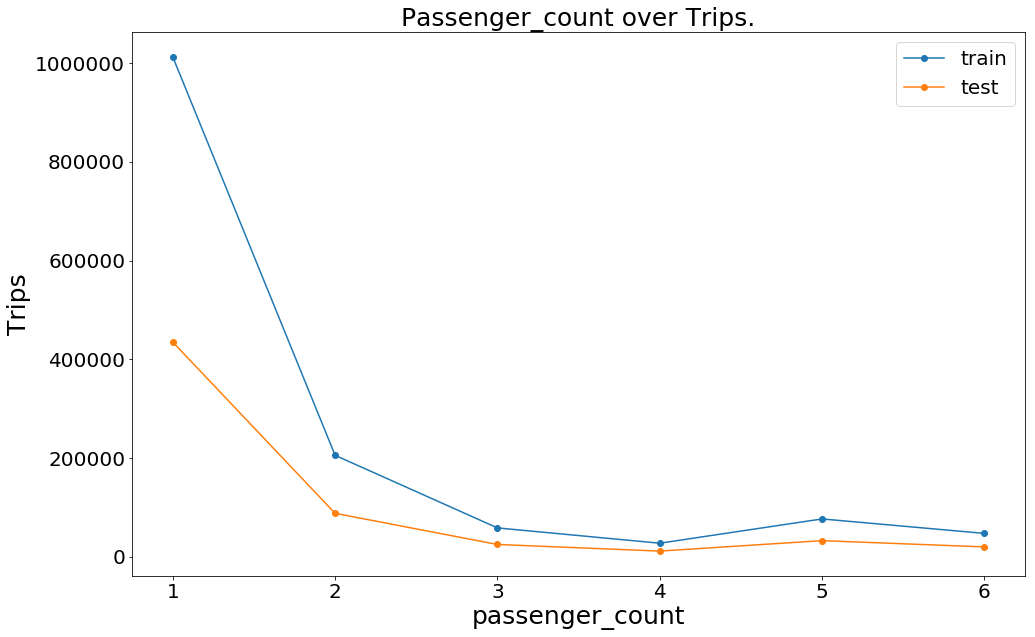

In [9]:
plt.plot(train.groupby('passenger_count').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('passenger_count').count()[['id']], 'o-', label='test')
plt.title('Passenger_count over Trips.',fontsize=25)
plt.legend(loc=0,prop={'size':20})
plt.xlabel('passenger_count',fontsize=25)
plt.ylabel('Trips',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.6.png')
plt.show()

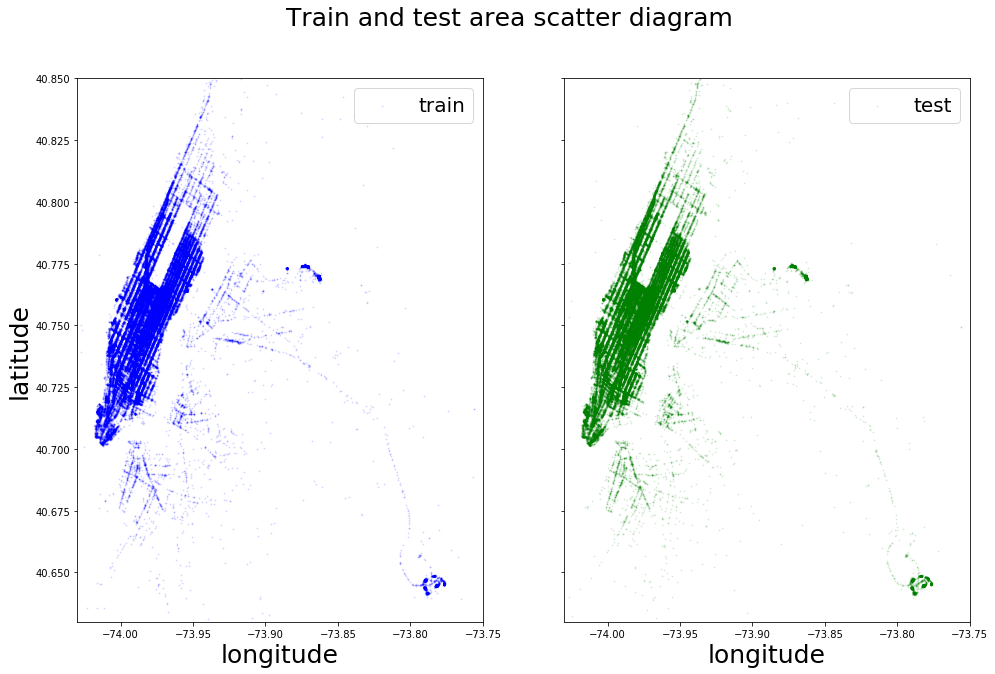

In [10]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values[:100000], test['pickup_latitude'].values[:100000],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area scatter diagram',fontsize=25)
ax[0].legend(loc=0,prop={'size':20})
ax[0].set_ylabel('latitude',fontsize=25)
ax[0].set_xlabel('longitude',fontsize=25)
ax[1].set_xlabel('longitude',fontsize=25)
ax[1].legend(loc=0,prop={'size':20})
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.savefig('C:/Users/WuJue/Desktop/figure/图4.7.png')
plt.show()

In [11]:
train.to_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/train_visualed.csv')
test.to_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/test_visualed.csv')